Script: \
Total number of days below freezing from 2059 - 2069  \
starting from July - June

In [1]:
#import statements
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from matplotlib import colorbar
import matplotlib.transforms as transforms
import cmocean
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#import os #Double check in a bit for the timeseries, average file
import math
import cmocean
import scipy.stats as stats

mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

In [2]:
anomaly_cm = cmocean.cm.tarn
longest_cm = 'cmo.thermal'

sim='001'
temp = 313.15 #40*C = 313.15K

In [3]:
def return_longest_continuous_days(array,start_index,end_index):
    #time, lat lon
    longest_days = np.zeros([192,288])
    continuous = np.zeros([192,288])
    current_streak=np.zeros([192,288])


    for time in range(start_index,end_index):#len(ts['TS'].shape[0])):
        #go through lat
        if time%100 == 0:
            print("        ",time)
        for lat in range(0,192):
            #go through lon
            for lon in range(0,288):
                #if it is  Above 35$^o$C 
                if math.isnan(array[time,lat,lon]) == False: #check that it is not nan
                    if array[time,lat,lon] > temp:
                        #if it is continuous,
                        if continuous[lat,lon] == 1:
                            #to that point +=1
                            current_streak[lat,lon] +=1

                        #if it is not continuous: 
                        elif continuous[lat,lon] == 0:
                            #set continous to true
                            continuous[lat,lon] = 1
                            #+=1 to current streak
                            current_streak[lat,lon] = 1
                    else:
                        current_streak[lat,lon] = 0
                        continuous[lat,lon] = 0
                            #turn continous to false
                else:
                    longest_days[lat,lon] =np.nan
                if current_streak[lat,lon] > longest_days[lat,lon] and current_streak[lat,lon] !=1:
                        longest_days[lat,lon] = current_streak[lat,lon]

    return longest_days

In [4]:
#import ocean in order to isolate the land
ocean_data = '/glade/work/vgarza/arise_regrid/arise_20350101-20691231.nc'
ocean = xr.open_dataset(ocean_data)

cmap = cmocean.cm.thermal
land_data = np.zeros([ocean['SST'][0].shape[0],ocean['SST'][0].shape[1]])
land_data[:] = np.nan
land_data[np.isnan(ocean['SST'][0])== True] = 0

In [5]:
path = '/glade/campaign/cesm/collections/ARISE-SAI-1.5/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'+sim+'/atm/proc/tseries/day_1/'
dataFile = xr.open_mfdataset(path+'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'+sim+'.cam.h1.TS.*' + '.nc')
dataFile['time'][12226:12591]

<xarray.DataArray 'time' (time: 365)>
array([cftime.DatetimeNoLeap(2068, 7, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2068, 7, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2068, 7, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2069, 6, 28, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2069, 6, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2069, 6, 30, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2068-07-01 00:00:00 ... 2069-06-30 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [6]:
year_increment = (25 + 0)
dataFile['time'][year_increment*365:year_increment*365+365]

<xarray.DataArray 'time' (time: 365)>
array([cftime.DatetimeNoLeap(2060, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 1, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 1, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2060, 12, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2060, 12, 31, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2060-01-01 00:00:00 ... 2060-12-31 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [7]:
path = '/glade/campaign/cesm/collections/CESM2-WACCM-SSP245/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'+sim+'/atm/proc/tseries/day_1/'
dataFile = xr.open_mfdataset(path+'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'+sim+'.cam.h1.TS.*'+'.nc')
date = dataFile['time'][7116:20137]
date[34*365:34*365+365]

<xarray.DataArray 'time' (time: 365)>
array([cftime.DatetimeNoLeap(2068, 7, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2068, 7, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2068, 7, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2069, 6, 28, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2069, 6, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2069, 6, 30, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2068-07-01 00:00:00 ... 2069-06-30 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [8]:
sim = '001'
path = '/glade/campaign/cesm/collections/ARISE-SAI-1.5/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'+sim+'/atm/proc/tseries/day_1/'
dataFile = xr.open_mfdataset(path+'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'+sim+'.cam.h1.TS.*' + '.nc')

temp_data = np.array(dataFile['TS'][0:12775,:,:]-land_data)
ts_time = dataFile['time'][0:12775]


ts_time

<xarray.DataArray 'time' (time: 12775)>
array([cftime.DatetimeNoLeap(2035, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2035, 1, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2035, 1, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2069, 12, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2069, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2069, 12, 31, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2035-01-01 00:00:00 ... 2069-12-31 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [9]:
sim = '001'
path = '/glade/campaign/cesm/collections/CESM2-WACCM-SSP245/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'+sim+'/atm/proc/tseries/day_1/'
dataFile = xr.open_mfdataset(path+'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'+sim+'.cam.h1.TS.*'+'.nc')

temp_data = np.array(dataFile['TS'][7116:20137,:,:]-land_data) #get 2035-2069)
ts_time = dataFile['time'][7116:20137]


ts_time

<xarray.DataArray 'time' (time: 13021)>
array([cftime.DatetimeNoLeap(2034, 7, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2034, 7, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2034, 7, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2070, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2070, 3, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2070, 3, 3, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2034-07-01 00:00:00 ... 2070-03-03 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [13]:
7116 -181

6935

In [14]:
cesm_time = dataFile['time'][20*365:54*365+365]

In [15]:
cesm_time

<xarray.DataArray 'time' (time: 12775)>
array([cftime.DatetimeNoLeap(2035, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2035, 1, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2035, 1, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2069, 12, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2069, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2069, 12, 31, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2035-01-01 00:00:00 ... 2069-12-31 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [16]:
ts = {}
ts['001','002','003','004','005','006','007','008','009','010']  ={}

cesm={}
cesm['001','002','003','004','005','006','007','008','009','010']  ={}

sim_array = ['001','002','003','004','005','006','007','008','009','010'] 


arise_2060s_longest_days = []
cesm_2060s_longest_days = []
#cesm_2015_longest_days = []

## Cut is so its only 2035 - 2069
for sim in sim_array: 
    print(sim)
    print('     Opening TS: ', sim)
    path = '/glade/campaign/cesm/collections/ARISE-SAI-1.5/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'+sim+'/atm/proc/tseries/day_1/'
    dataFile = xr.open_mfdataset(path+'b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.'+sim+'.cam.h1.TS.*' + '.nc')
    
    ts[sim] = np.array(dataFile['TS'][0:12775,:,:]-land_data)
    ts_time = dataFile['time'][0:12775]
    print('     Opening CESM: ', sim)
    path = '/glade/campaign/cesm/collections/CESM2-WACCM-SSP245/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'+sim+'/atm/proc/tseries/day_1/'
    dataFile = xr.open_mfdataset(path+'b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.'+sim+'.cam.h1.TS.*'+'.nc')
    
    cesm[sim] = np.array(dataFile['TS'][20*365:54*365+365,:,:]-land_data) #get 2035-2069)
    cesm_time = dataFile['time'][20*365:54*365+365]
    print('     Calculate Days Below Freezing')
    #Calculate the longest days
    for year in range(0,10):
        year_increment = 25 + year
        
        if year % 9 == 0:
            time = dataFile['time'][7116:20137]
            
            
            print('ARISE: ')
           # print(ts_time[(year_increment)*365:year_increment*365+365][0])
            print(ts_time[(year_increment)*365:(year_increment)*365+365][0])
            
            print("CESM: ")
            print(cesm_time[(year_increment)*365:year_increment*365+365][0])
            #print(cesm_time[(year_increment-1)*365+181:(year_increment-1)*365+365+181][0])
        #year_increment*365+181:year_increment*365+365+181
        
        arise_2060s_longest_days.append(return_longest_continuous_days(ts[sim],(year_increment)*365,
                                                                       (year_increment)*365+365))
        cesm_2060s_longest_days.append(return_longest_continuous_days(cesm[sim],year_increment*365,year_increment*365+365))


001
     Opening TS:  001
     Opening CESM:  001
     Calculate Days Below Freezing
ARISE: 
<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(2060, 1, 1, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 2060-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds
CESM: 
<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(2060, 1, 1, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 2060-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds
         9200
         9300
         9400
         9200
         9300
         9400
         9500
         9600
         9700
         9800
         9500
         9600
         9700
         9800
         9900
         10000
         10100
         10200
         9900
         10000
         10100
         10200
         10300
         10400
         10500
         10300
         10400
         10500
         10600
         1070

In [17]:
#Over all mean of all simulations
arise_2060s_longest_days_mean = np.mean(np.array(arise_2060s_longest_days),axis = 0)
cesm_2060s_longest_days_mean = np.mean(np.array(cesm_2060s_longest_days),axis = 0)

In [18]:
print(np.shape(arise_2060s_longest_days))
print(np.shape(arise_2060s_longest_days_mean))

(100, 192, 288)
(192, 288)


In [20]:
print(np.shape(cesm_2060s_longest_days))
print(np.shape(cesm_2060s_longest_days_mean))

(100, 192, 288)
(192, 288)


In [21]:
anomaly_2060s_means = arise_2060s_longest_days_mean - cesm_2060s_longest_days_mean

## Plotting: 

In [22]:
def plot_global(x,y,plot,levels,title,extend,cmap):
    #Nan out 0's so it doesn't show up on plot
    plot[plot==0] = np.nan
    
    fig,ax= plt.subplots(figsize =(13,19),facecolor='white',subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0))) # defining a figure
   
    plt.title(title)
    #ax.add_feature(cfeature.LAND, color = 'lightgray',zorder = 1) #adding land
    ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
    ax.set_global()  
    
    gl1 = ax.gridlines(ccrs.PlateCarree(),
              linestyle='-',
              y_inline=False, x_inline=False,
              color='grey', alpha=.5, linewidth=1, draw_labels=True)
    gl1.xformatter = LONGITUDE_FORMATTER
    gl1.yformatter = LATITUDE_FORMATTER
    
     #plot the data
    p = ax.contourf(x, y,
                    plot,levels,extend=extend,
                    transform=ccrs.PlateCarree(),cmap=cmap)
    
    cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend=extend) # add a colorbar
    cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
    cbar.set_label('# Days')

    plt.show() 
    plt.close()
    

    
def plot_europe(x,y,plot,levels,title,extend,cmap):

    plot[plot==0] = np.nan
                    

    fig,ax= plt.subplots(figsize =(13,19),facecolor='white',subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=0))) # defining a figure

    plt.title(title)

    ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
    ax.set_extent([-10,50,25,75],crs=ccrs.PlateCarree() ) 

    #plot the data
    p = ax.contourf(x, y,
                    plot,levels,extend=extend, #plot the surface
                    transform=ccrs.PlateCarree(),cmap=cmap)

    gl1 = ax.gridlines(ccrs.PlateCarree(),
                  linestyle='-',
                  y_inline=False, x_inline=False,
                  color='grey', alpha=.5, linewidth=1, draw_labels=True)
    gl1.xformatter = LONGITUDE_FORMATTER
    gl1.yformatter = LATITUDE_FORMATTER
    
    cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend = extend) # add a colorbar
    cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
    cbar.set_label('# Days')


    plt.show() 
    plt.close()
    
def plot_north_america(x,y,plot,levels,title,extend,cmap):
    plot[plot==0] = np.nan
                    

    fig,ax= plt.subplots(figsize =(13,19),facecolor='white',subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=0))) # defining a figure

    plt.title(title)

    ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
    ax.set_extent([-168,-52,25,75],crs=ccrs.PlateCarree() ) 

    #plot the data
    p = ax.contourf(x, y,
                    plot,levels,extend=extend, #plot the surface
                    transform=ccrs.PlateCarree(),cmap=cmap)

    gl1 = ax.gridlines(ccrs.PlateCarree(),
                  linestyle='-',
                  y_inline=False, x_inline=False,
                  color='grey', alpha=.5, linewidth=1, draw_labels=True)
    gl1.xformatter = LONGITUDE_FORMATTER
    gl1.yformatter = LATITUDE_FORMATTER
    
    cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend = extend) # add a colorbar
    cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
    cbar.set_label('# Days')


    plt.show() 
    plt.close()

In [23]:
levels = np.arange(0,40,1)
anom_levs=np.arange(-10,11,1)


NA_levs = np.arange(0,40,1)
NA_anom_levs = np.arange(-8,9,1)

EU_levs = np.arange(0,40,1)
EU_anom_levs = np.arange(-8,9,1)

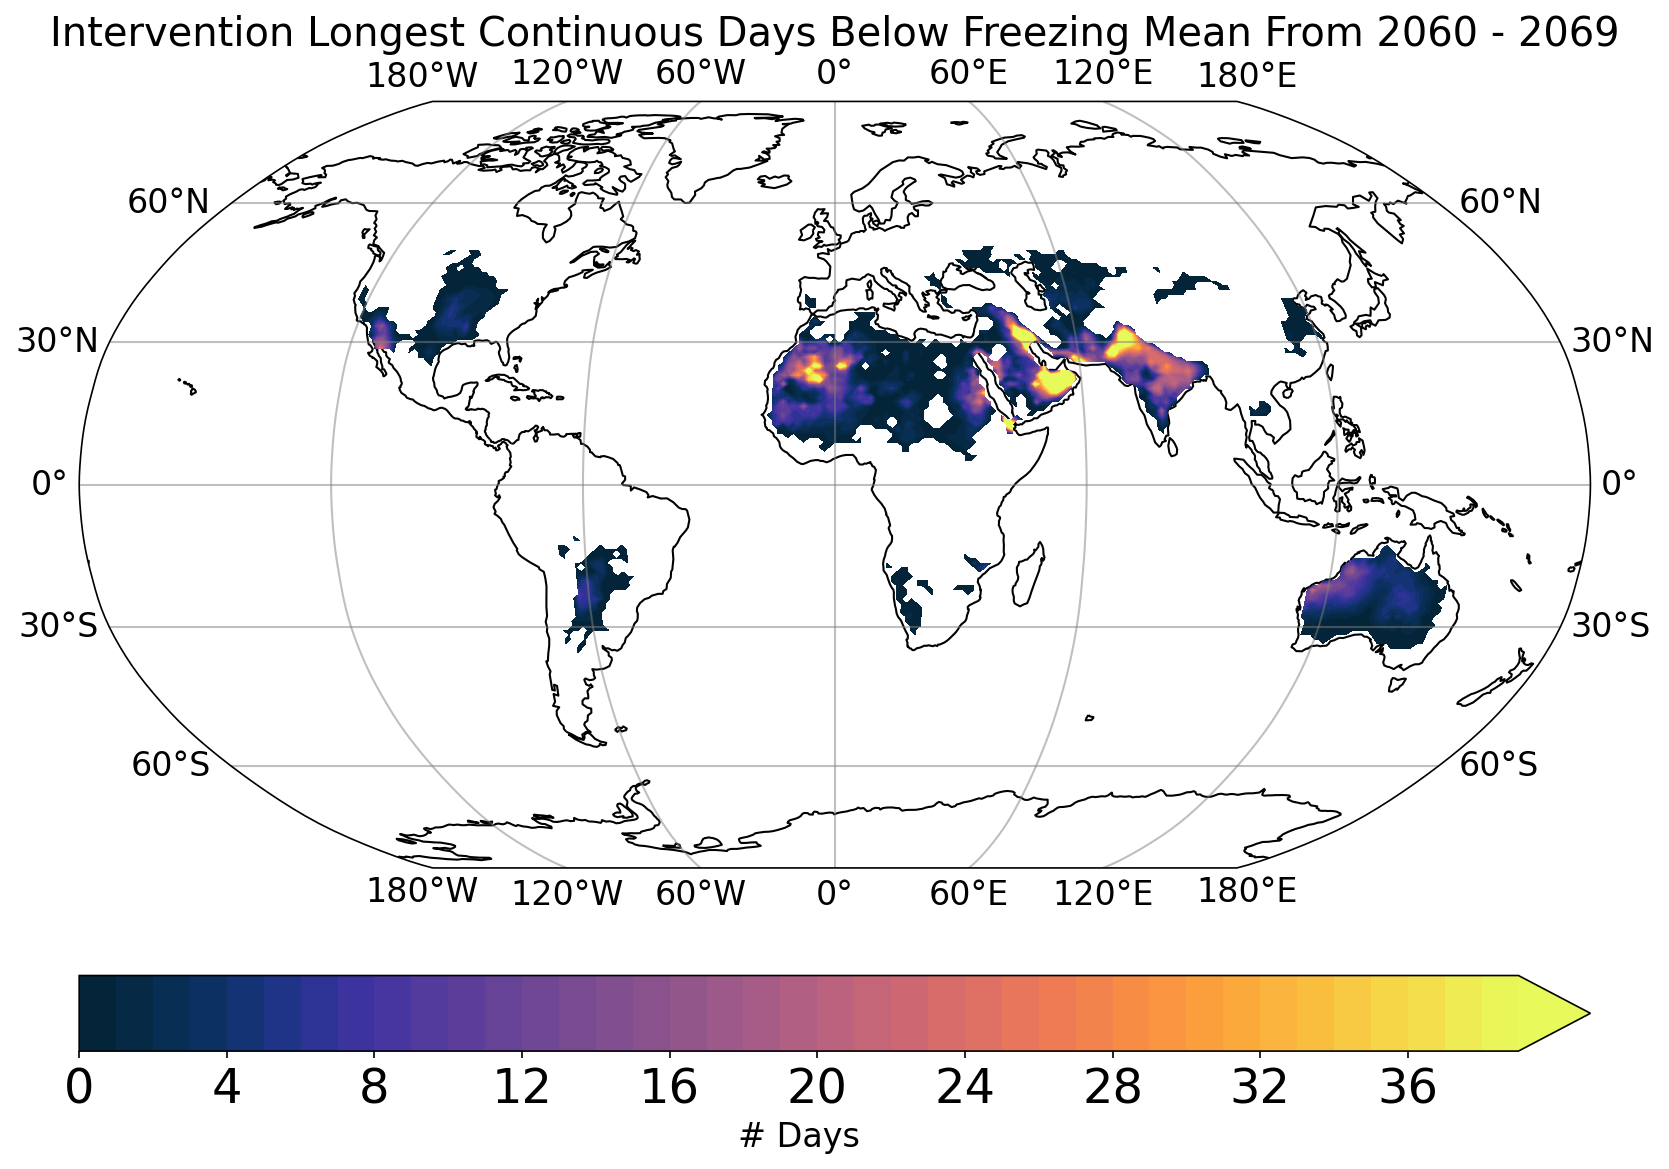

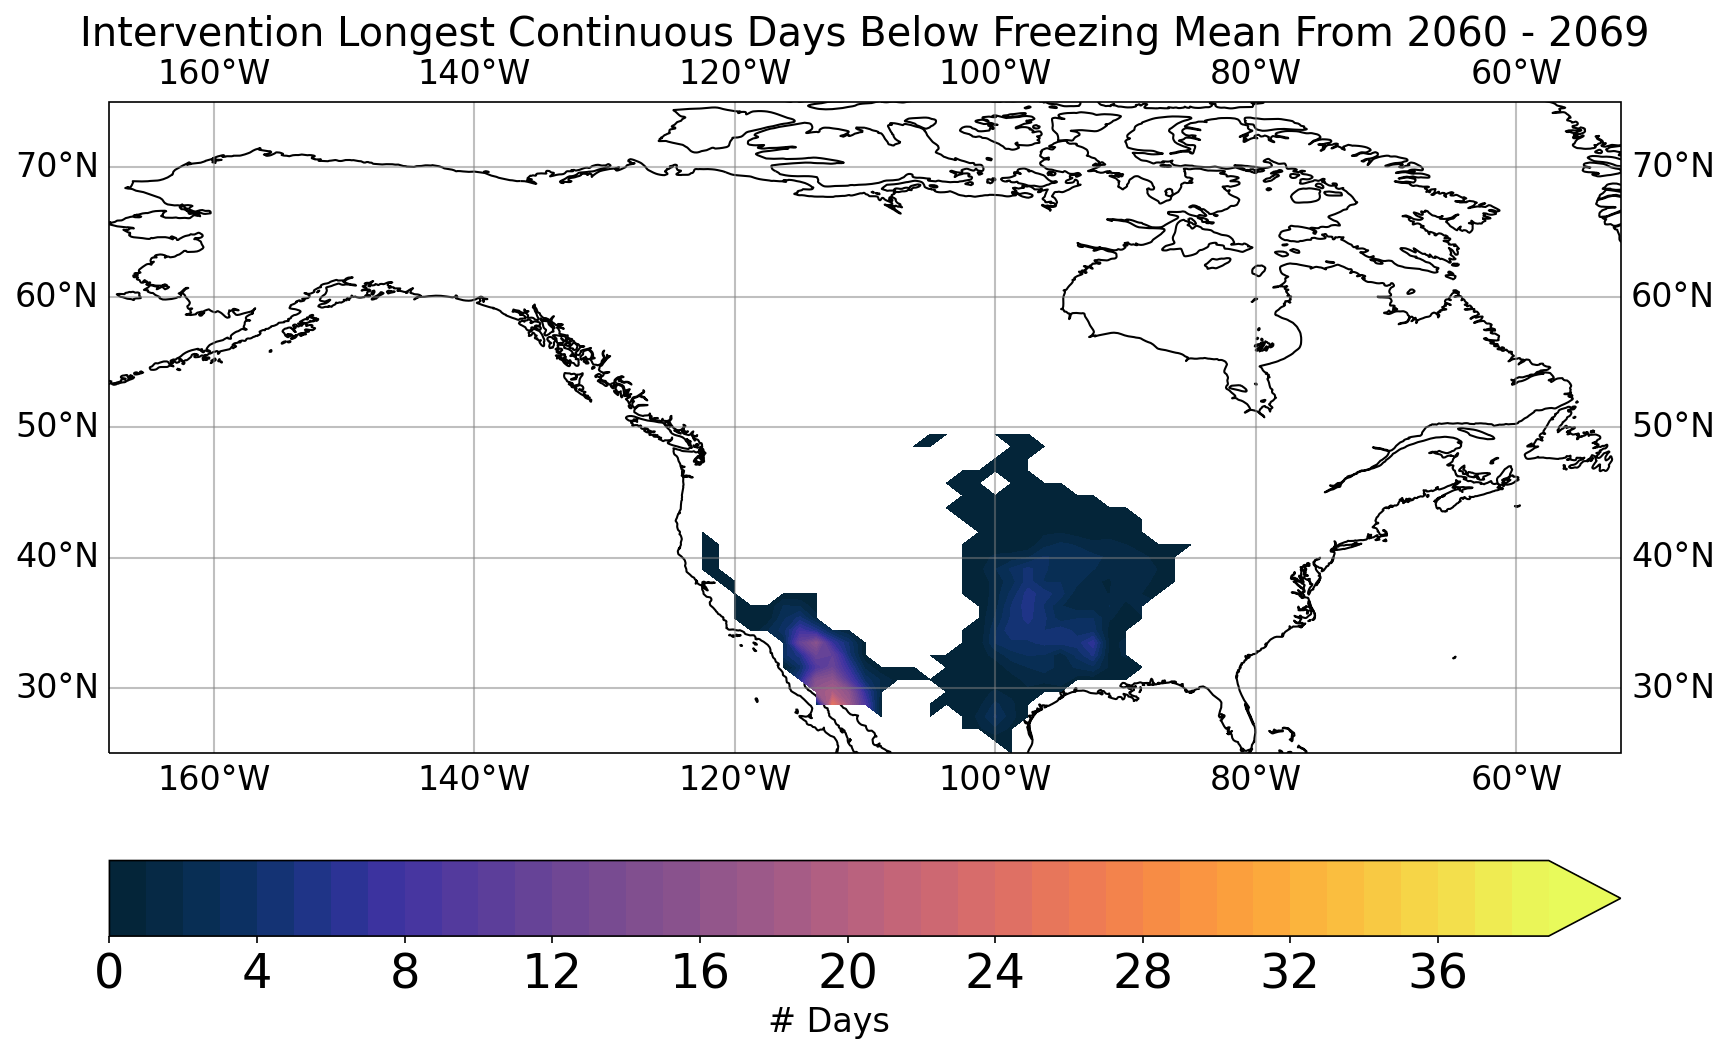

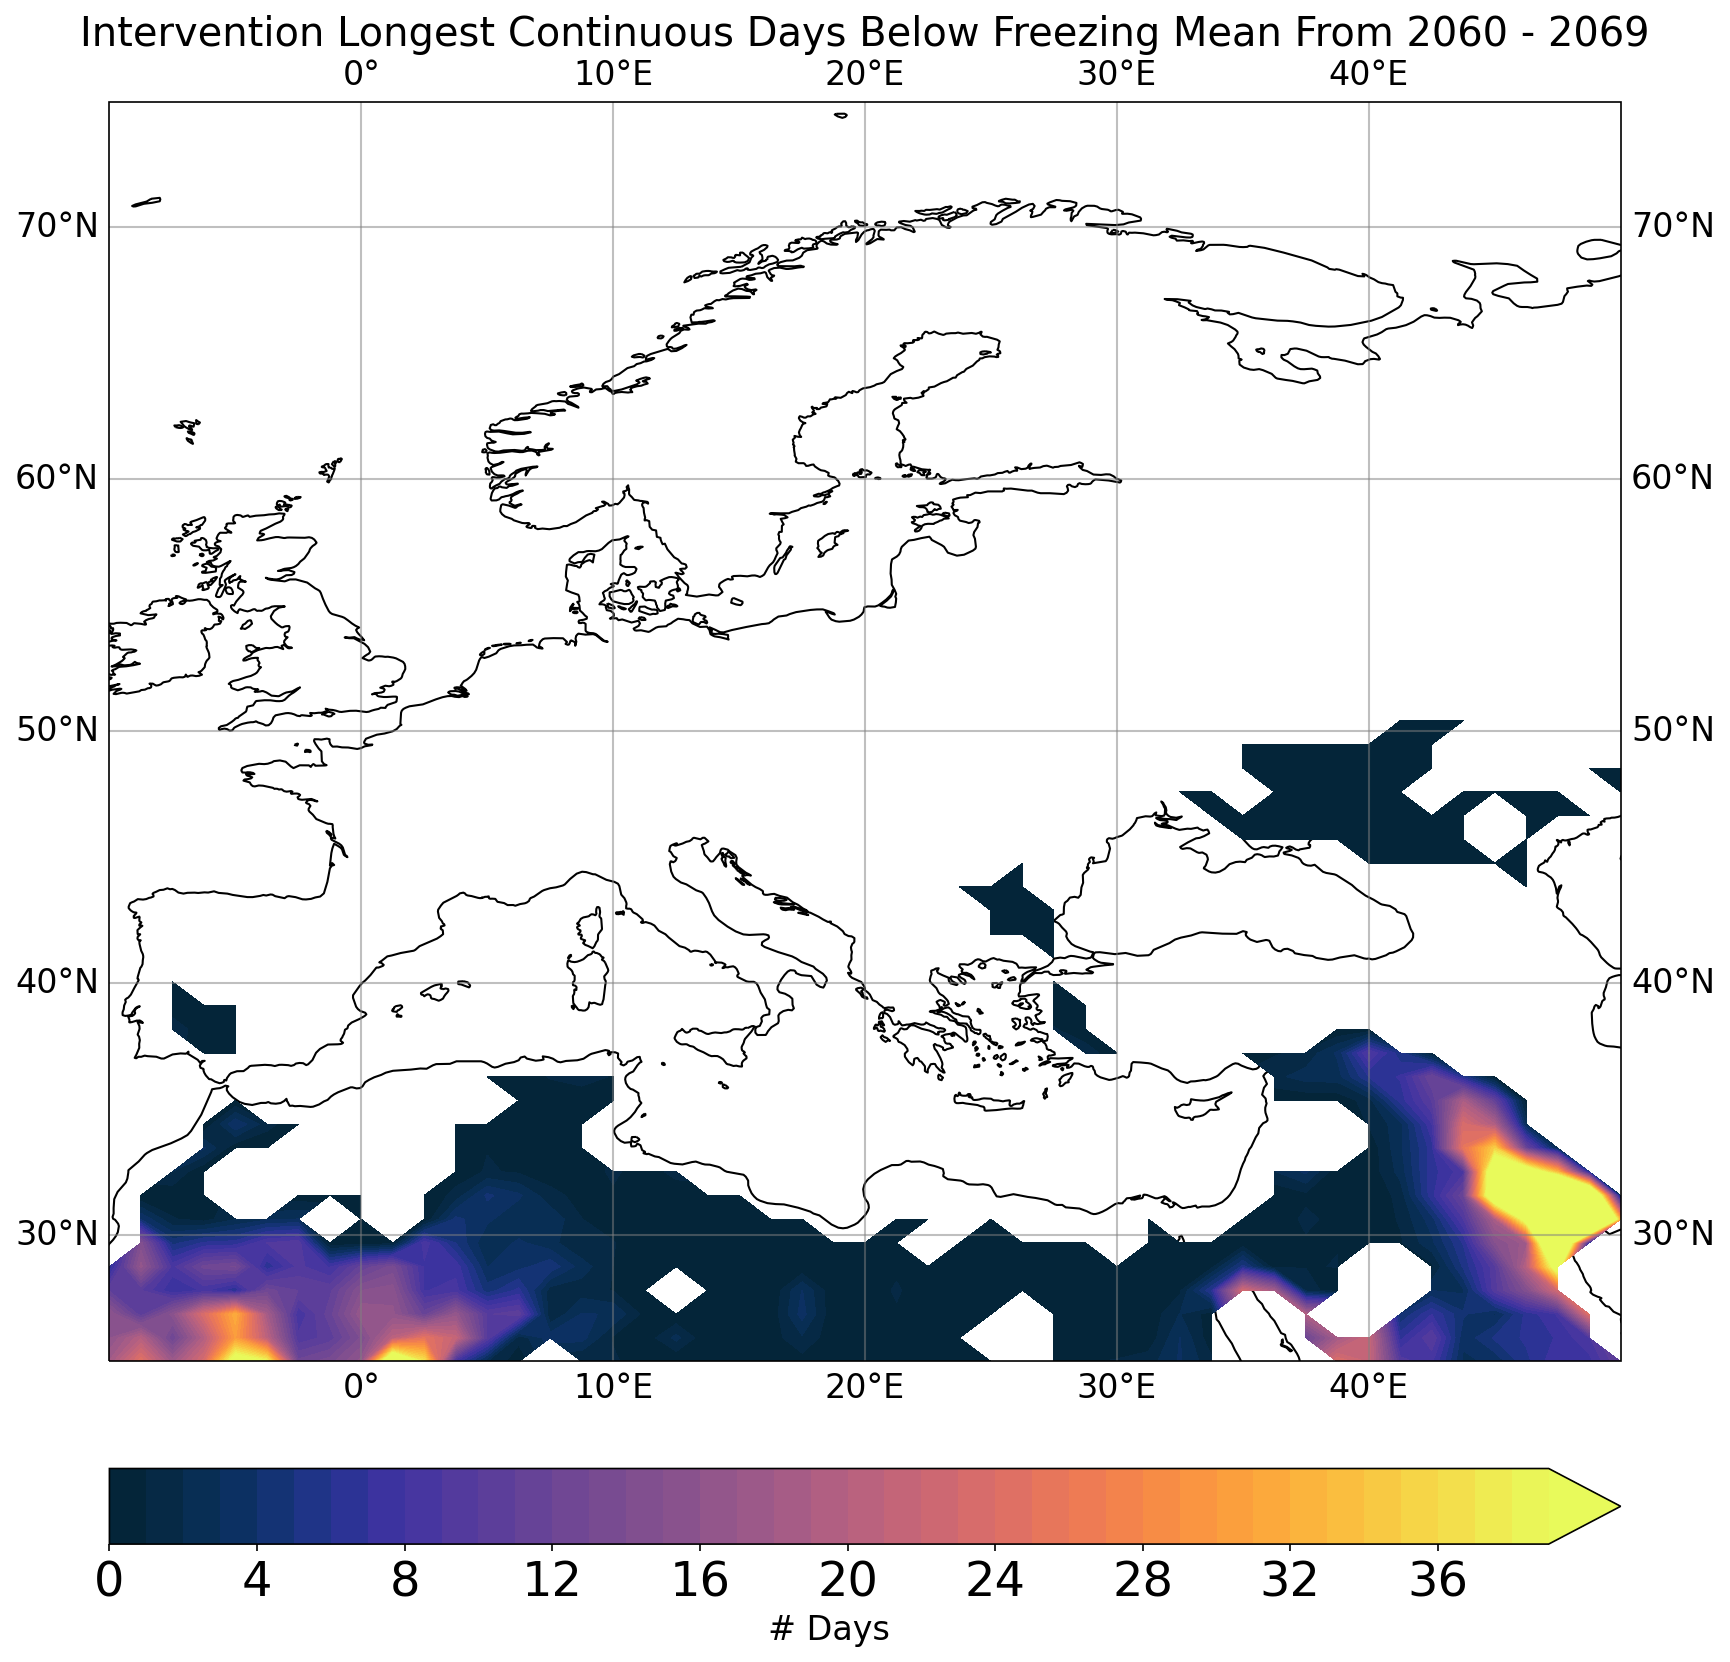

In [32]:
y = dataFile['lat']
plot, x  = add_cyclic_point(arise_2060s_longest_days_mean, coord=dataFile['lon'])
title = 'Intervention Longest Continuous Days Below Freezing Mean From 2060 - 2069'

plot_global(x,y,plot,levels,title,'max',longest_cm)
plot_north_america(x,y,plot,NA_levs,title,'max',longest_cm)
plot_europe(x,y,plot,EU_levs,title,'max',longest_cm)

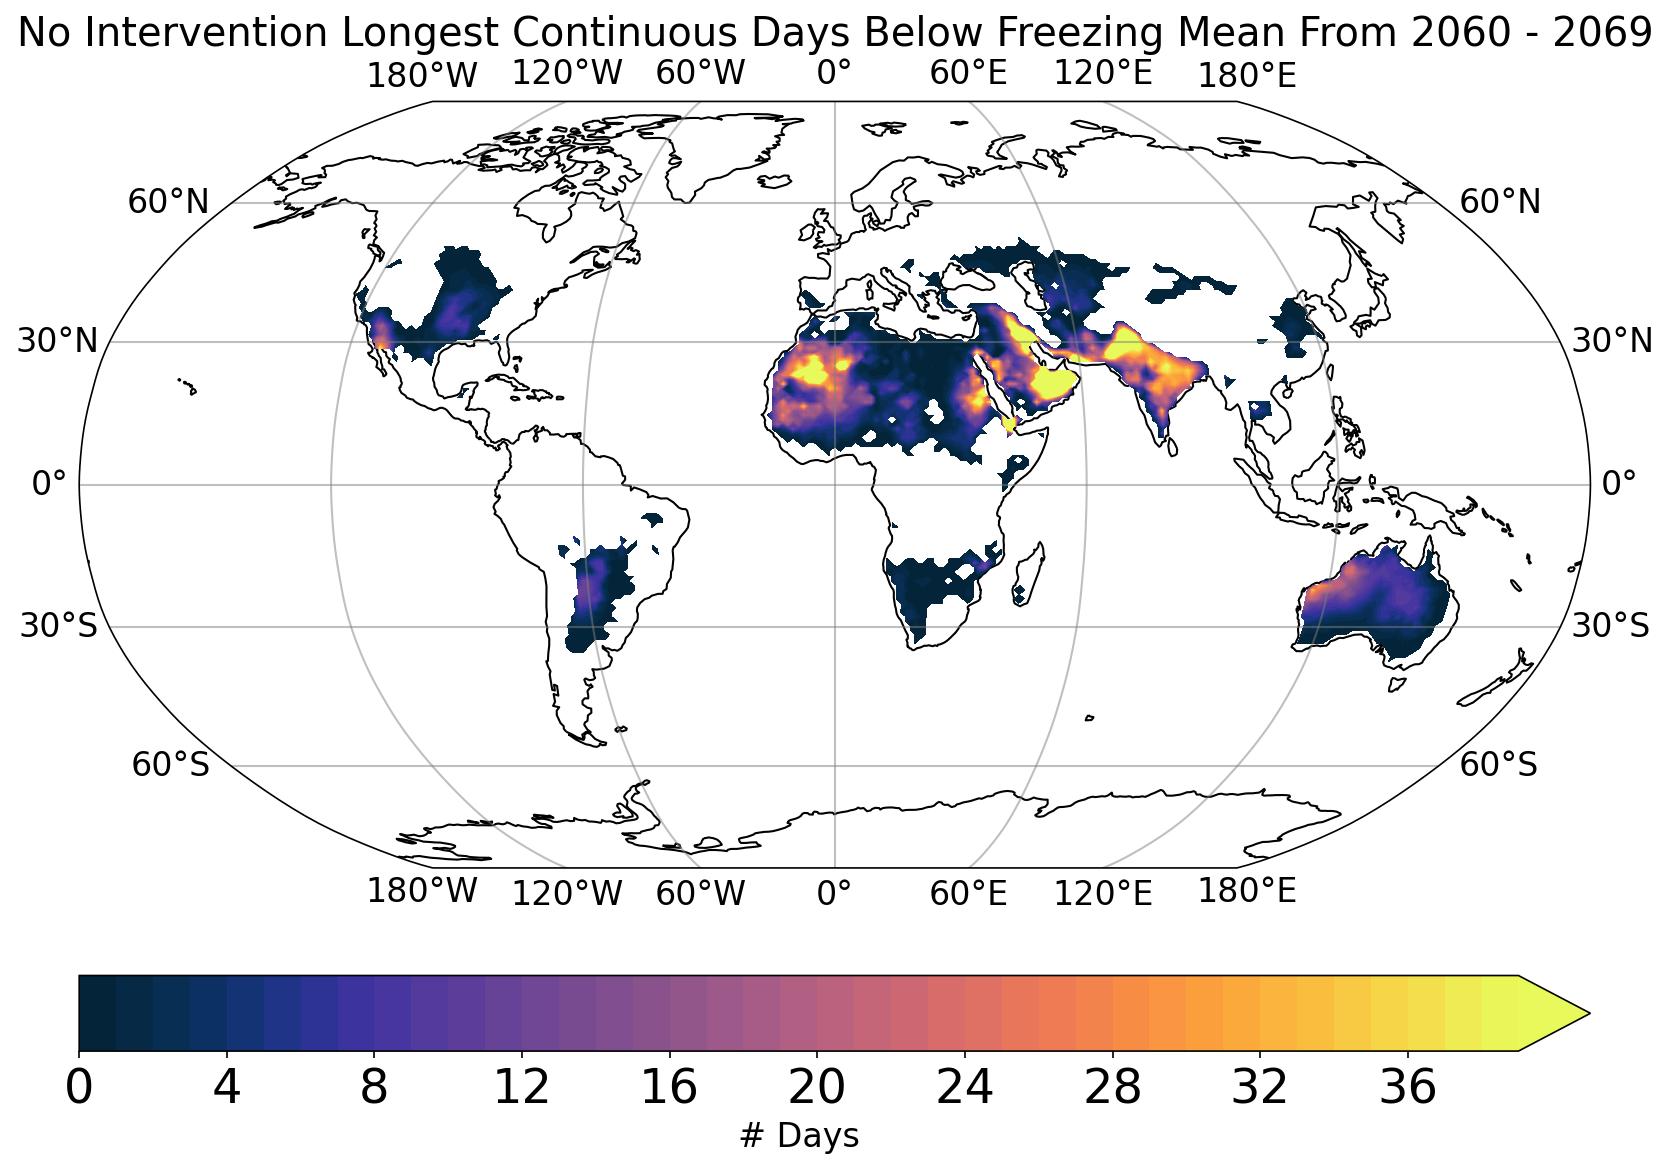

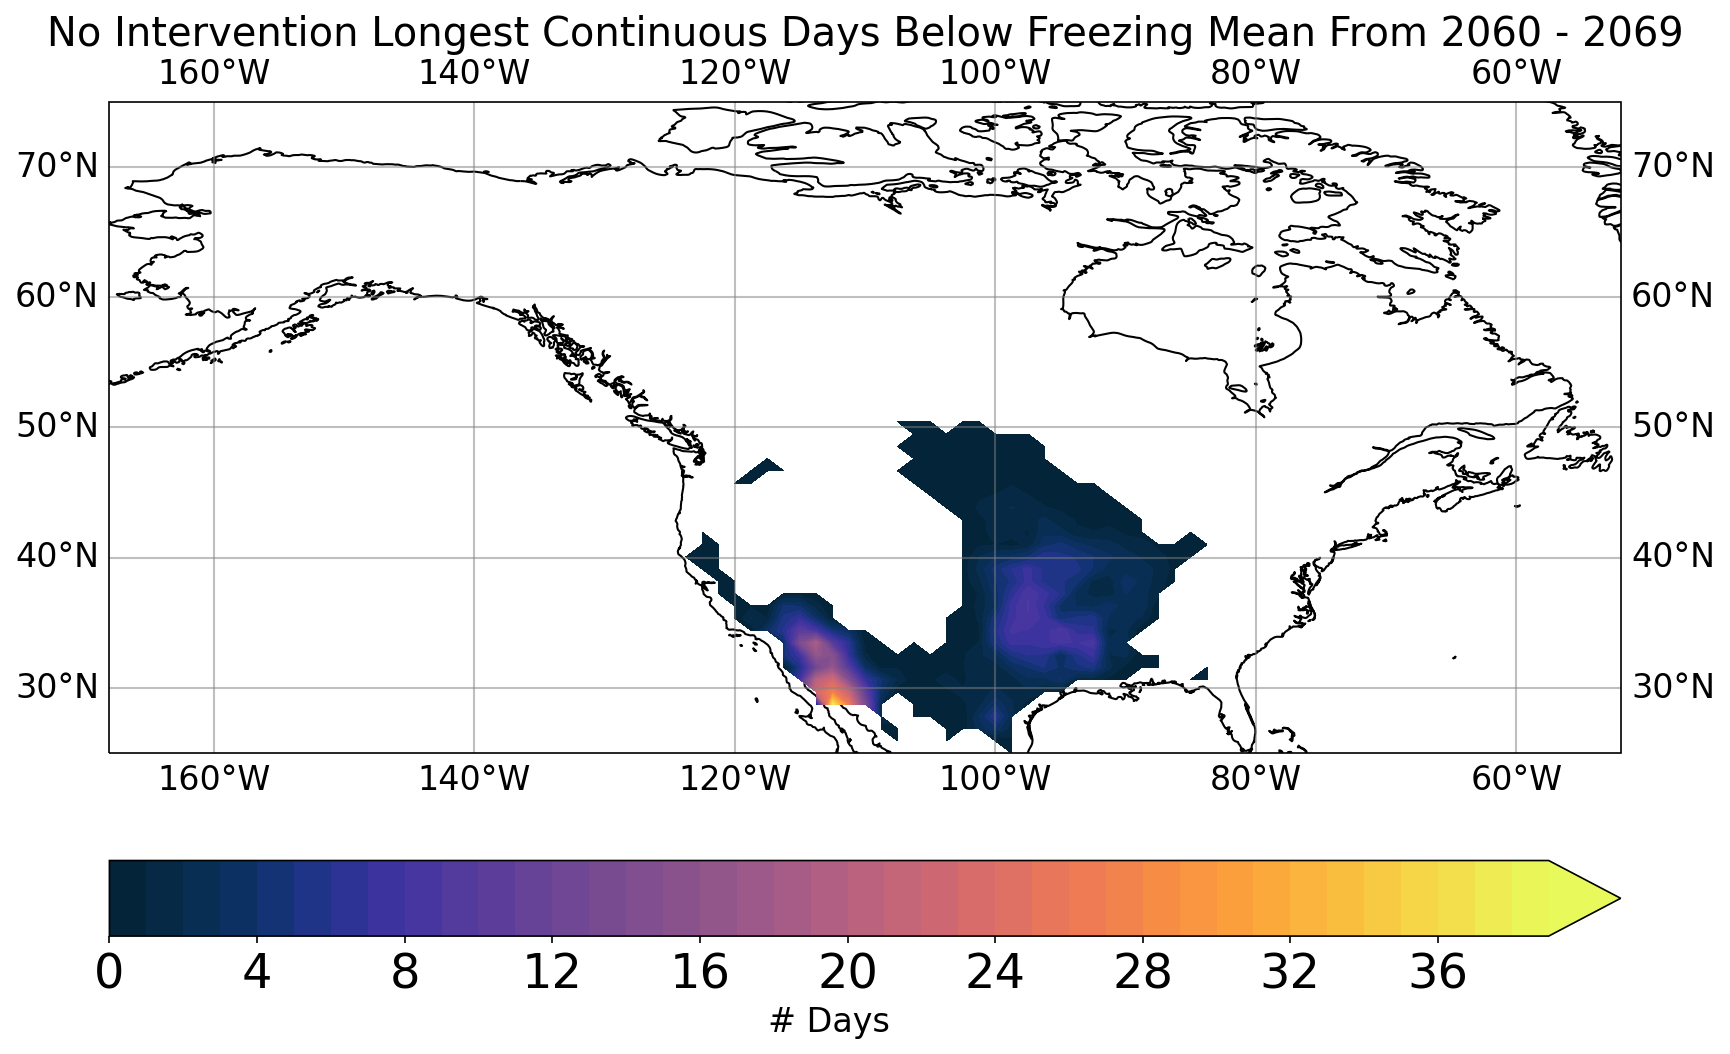

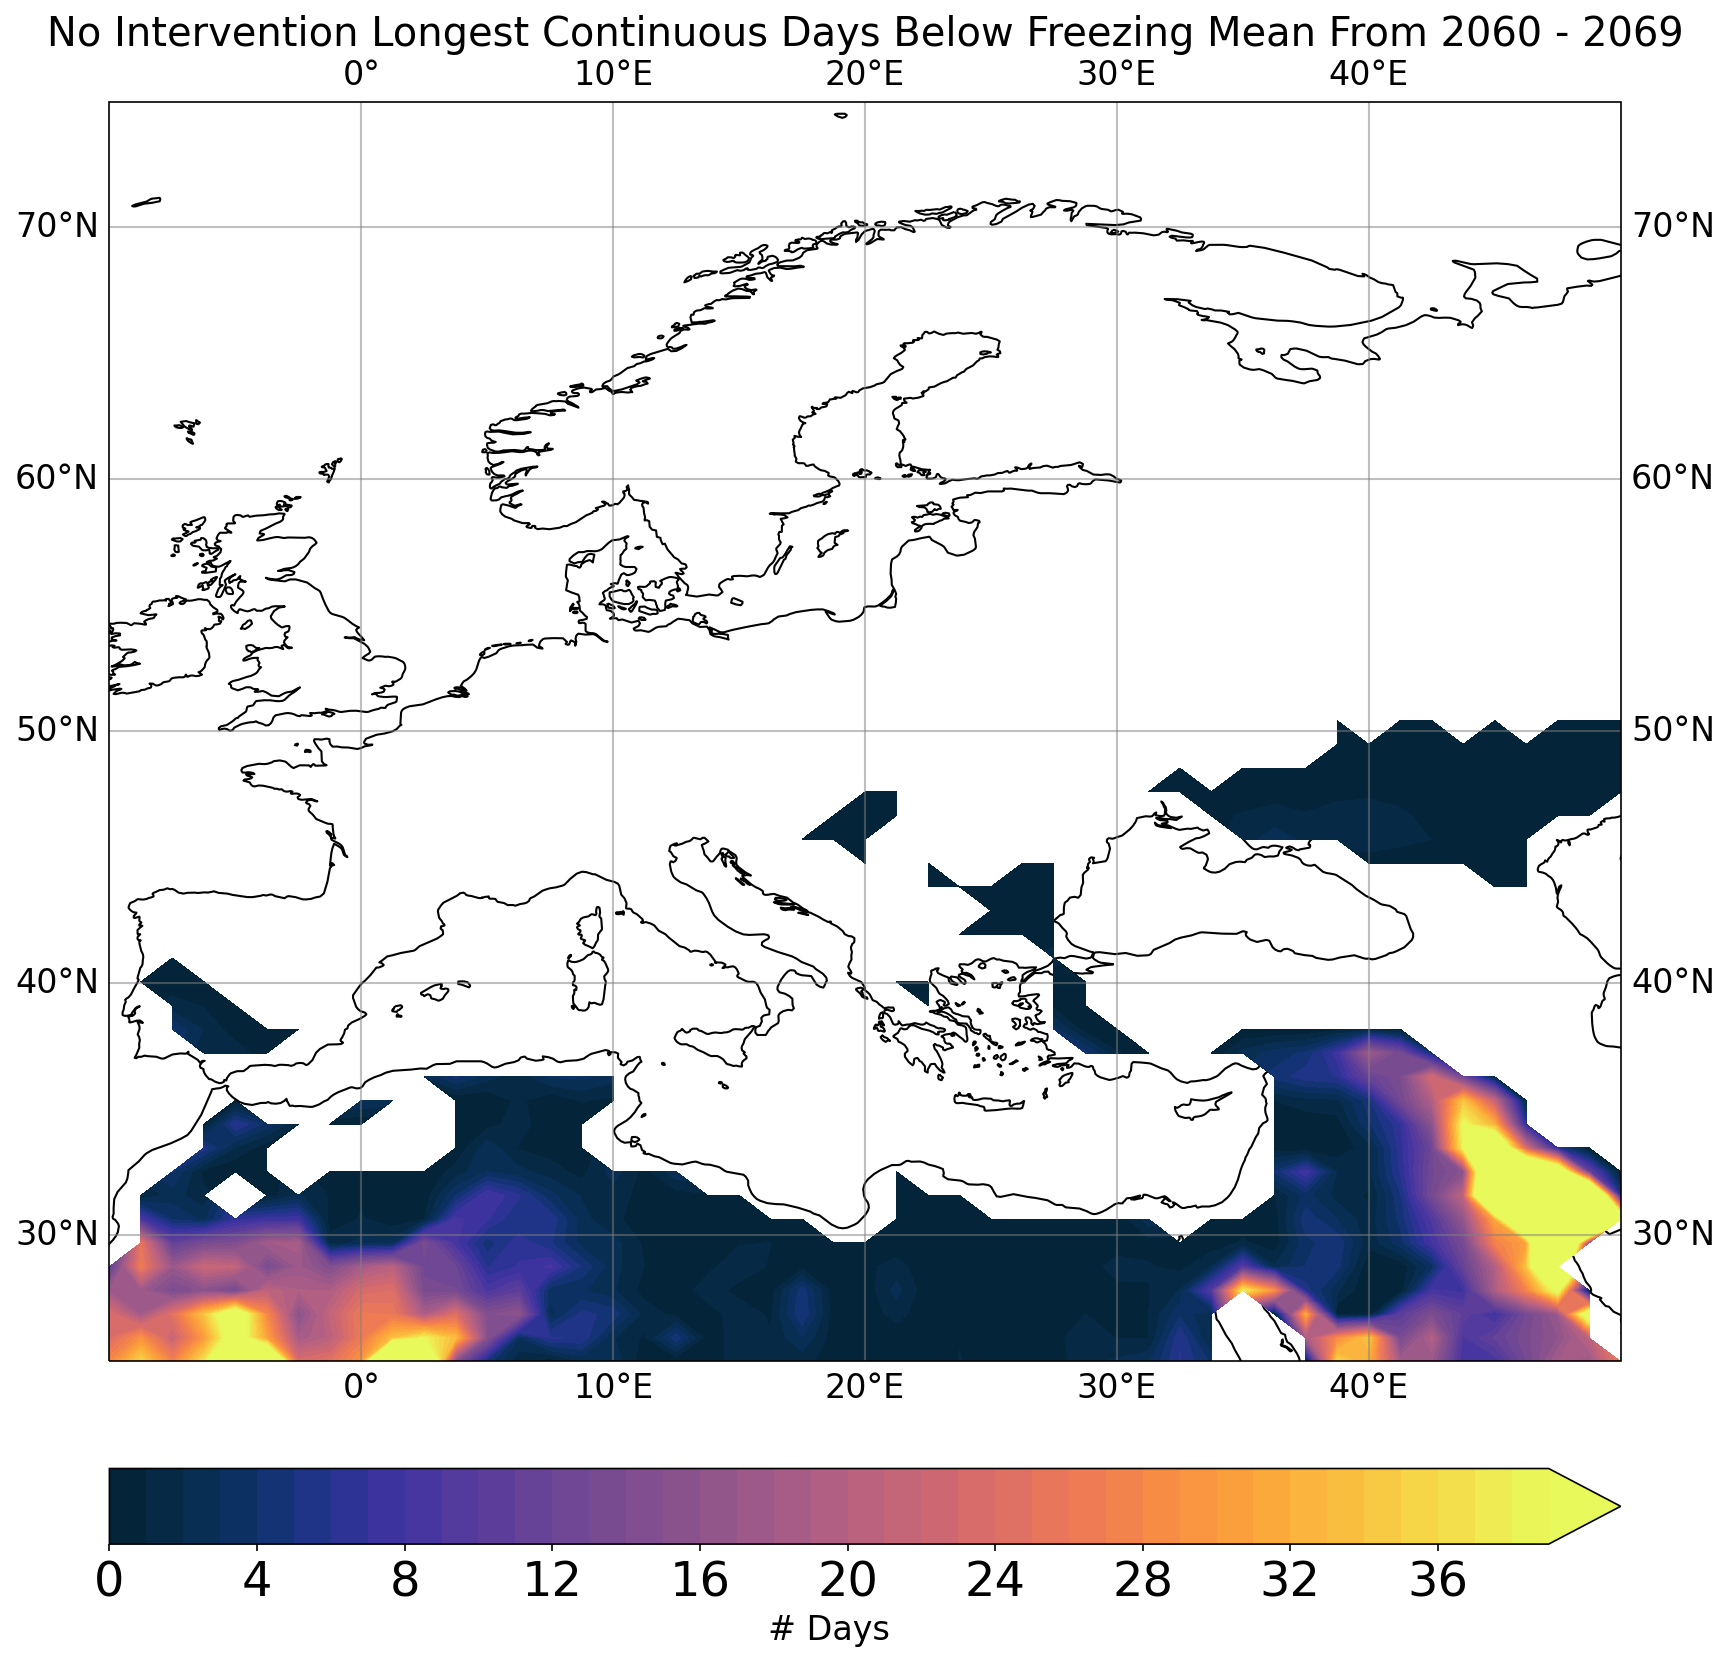

In [33]:
y = dataFile['lat']
plot, x  = add_cyclic_point(cesm_2060s_longest_days_mean, coord=dataFile['lon'])
title = 'No Intervention Longest Continuous Days Below Freezing Mean From 2060 - 2069'

plot_global(x,y,plot,levels,title,'max',longest_cm)
plot_north_america(x,y,plot,NA_levs,title,'max',longest_cm)
plot_europe(x,y,plot,EU_levs,title,'max',longest_cm)

In [34]:
np.nanmin(anomaly_2060s_means)

-31.25

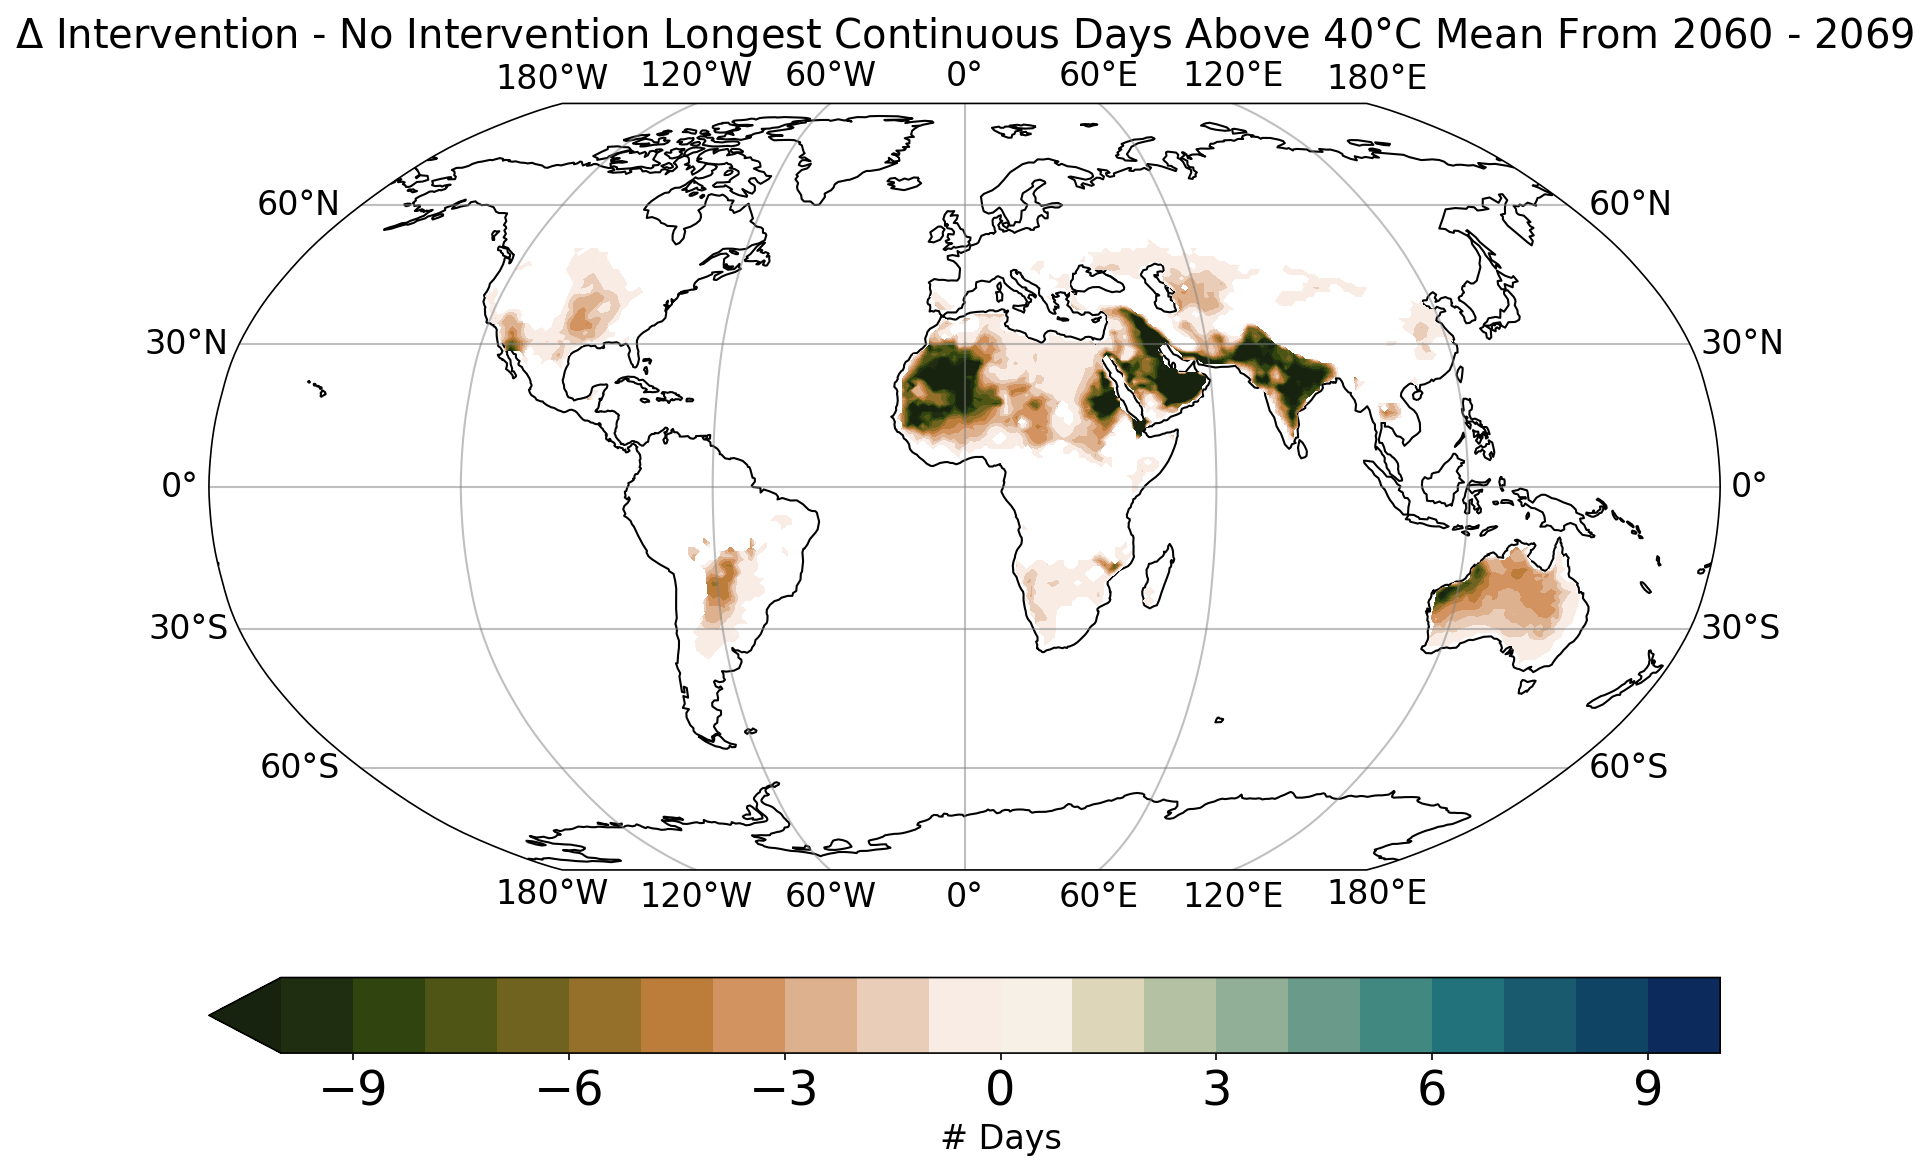

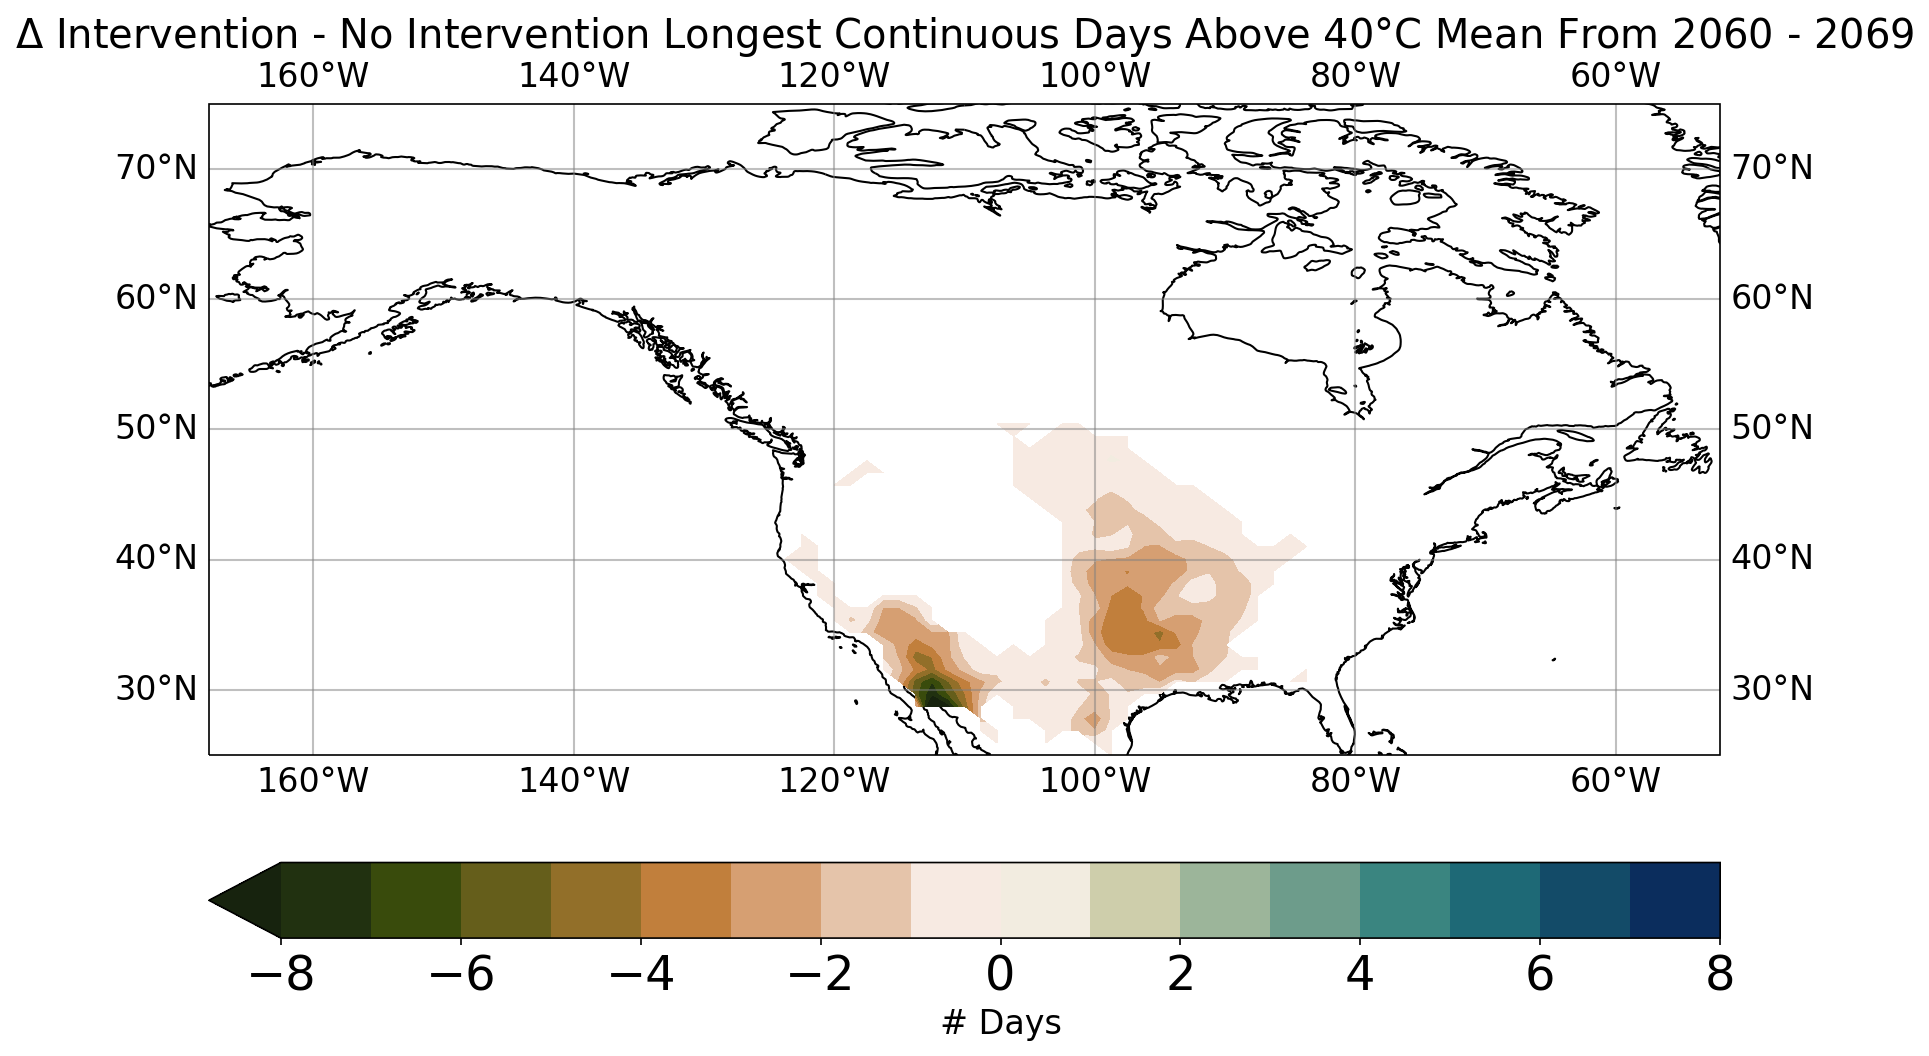

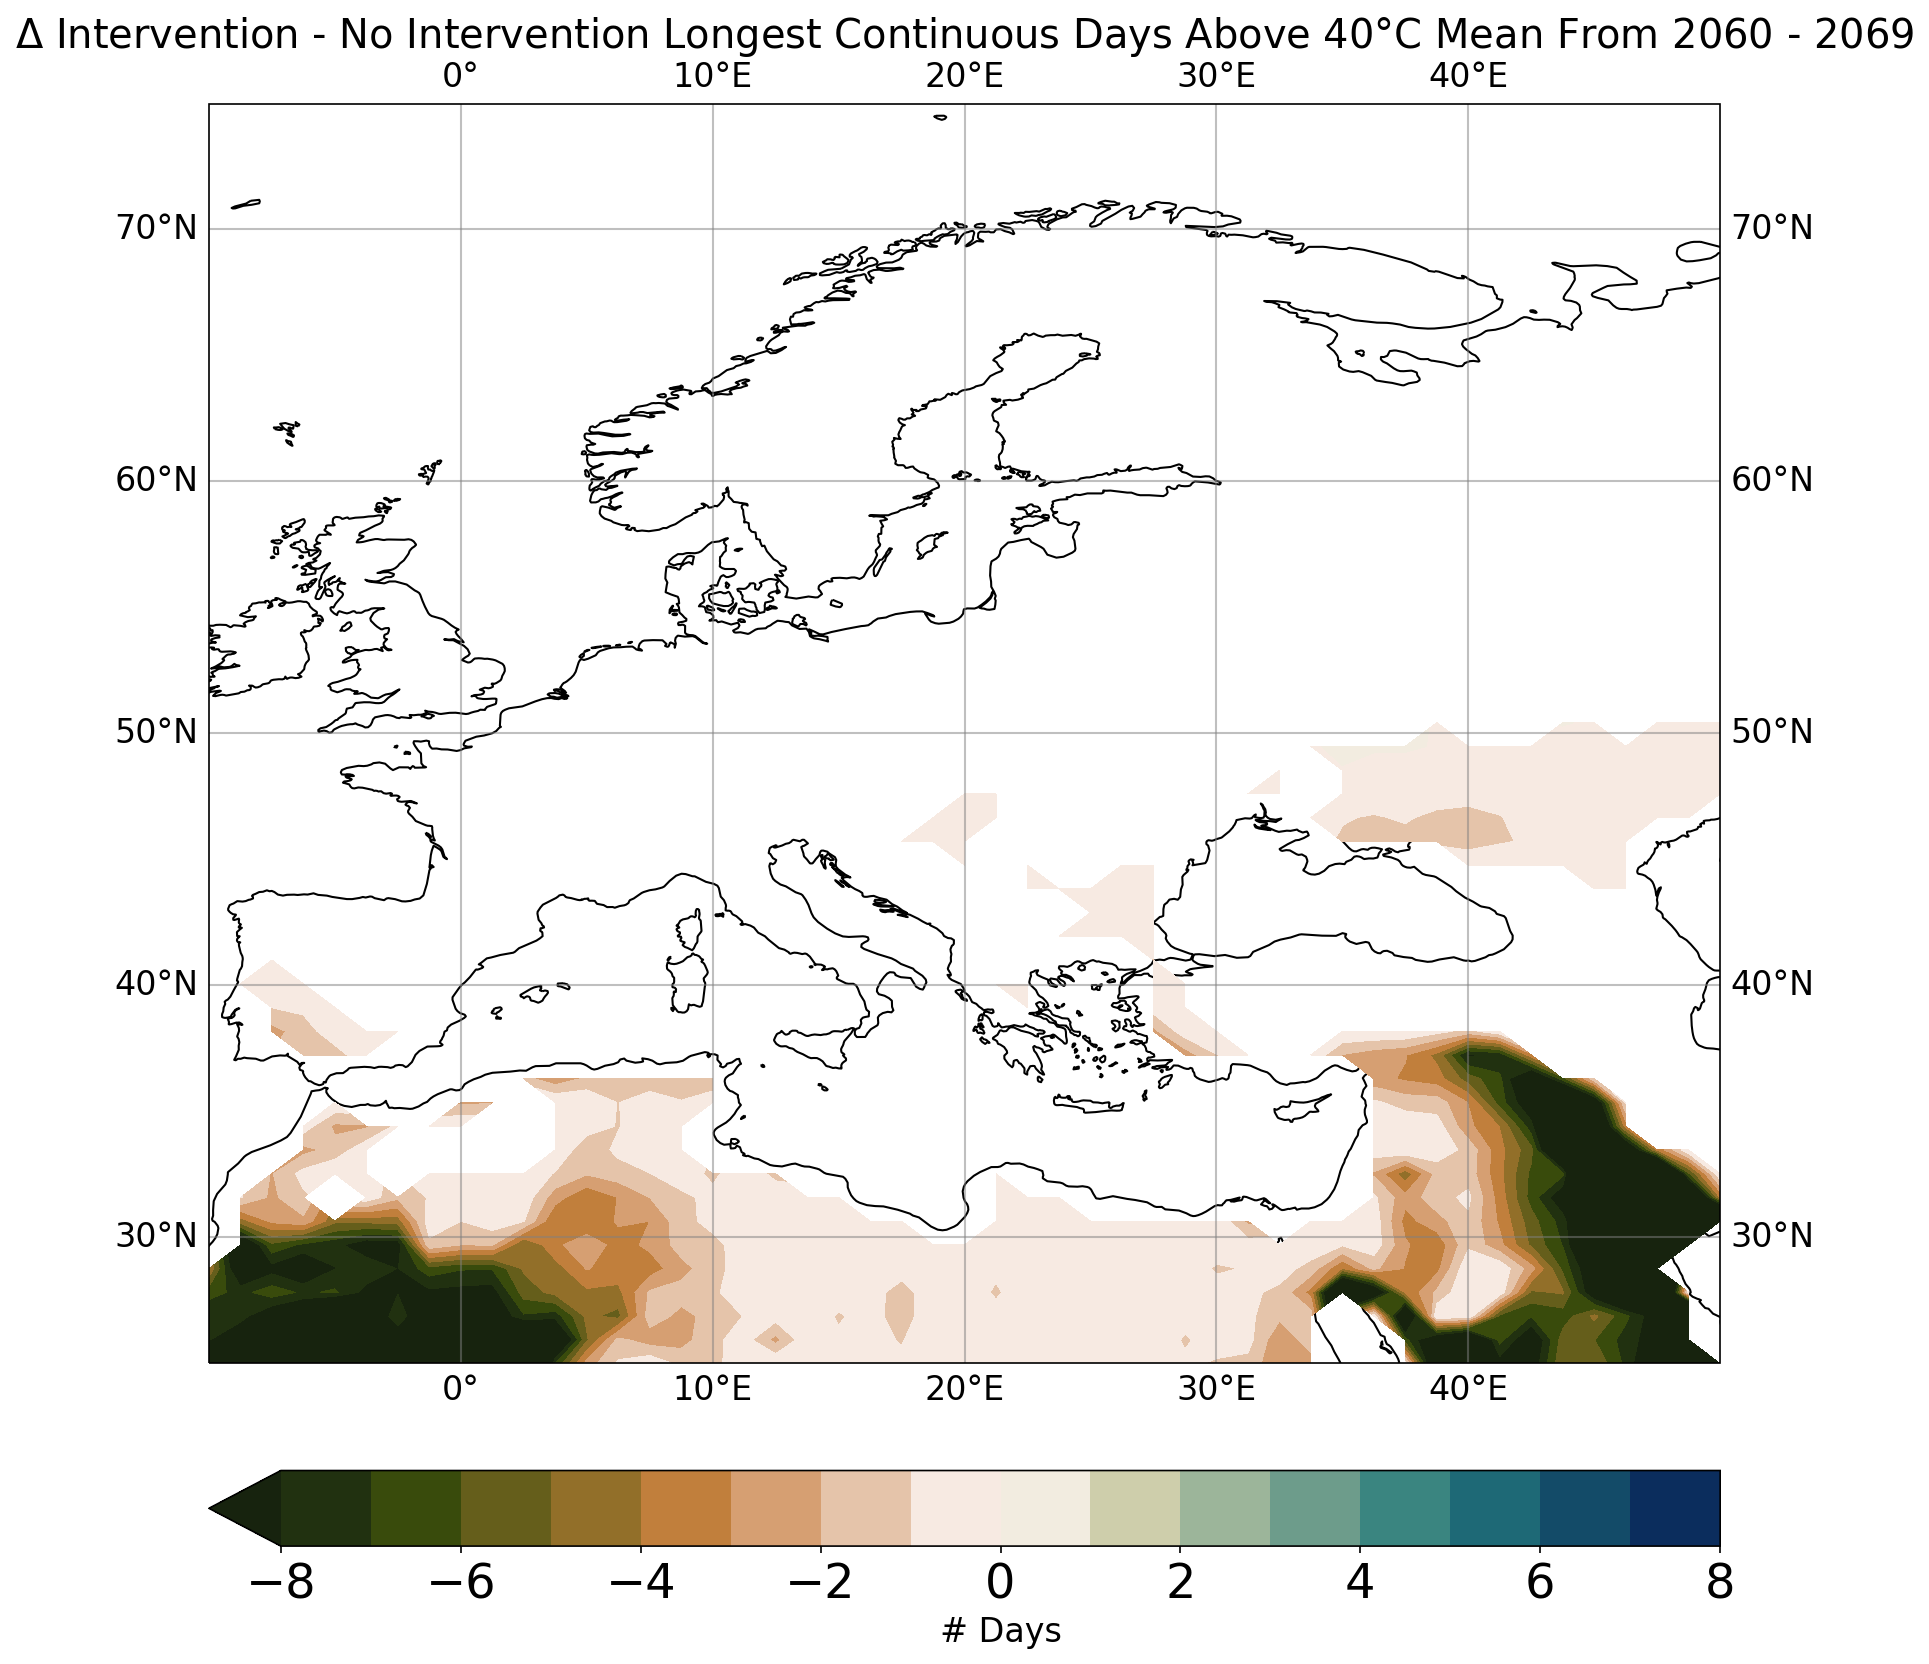

In [36]:
y = dataFile['lat']
plot, x  = add_cyclic_point(anomaly_2060s_means, coord=dataFile['lon'])
title = "$\Delta$ Intervention - No Intervention Longest Continuous Days Above 40$\degree$C Mean From 2060 - 2069"

plot_global(x,y,plot,anom_levs,title,'min',anomaly_cm)
plot_north_america(x,y,plot,NA_anom_levs,title,'min',anomaly_cm)
plot_europe(x,y,plot,EU_anom_levs,title,'min',anomaly_cm)

In [28]:
np.shape(dataFile['lat'])

(192,)

In [29]:
np.shape(x)

(289,)

In [30]:
print(np.shape(arise_2060s_longest_days))
print(np.shape(arise_2060s_longest_days_mean))

(100, 192, 288)
(192, 288)


In [31]:
##saving new cdf file
#do not run
#lat: 384nlon: 320
import netCDF4 as nc
import numpy as np
save_to_file = 'continuous_days_above_40_jan_data.nc'
dataSet = nc.Dataset(save_to_file, 'w', format='NETCDF4')

#(100, 192, 288)
#(192, 288)

lat = dataSet.createDimension('lat', 192)
lon = dataSet.createDimension('lon',288)

data_points = dataSet.createDimension('data_points',100)


arise_2060s_continuous_days_below_freezing = dataSet.createVariable('arise_2060s_continuous_days_above_40', np.float32, ('data_points','lat','lon'))
arise_2060s_continuous_days_below_freezing.units = '# Days'

cesm_2060s_continuous_days_below_freezing = dataSet.createVariable('cesm_2060s_continuous_days_above_40', np.float32, ('data_points','lat','lon'))
cesm_2060s_continuous_days_below_freezing.units = '# Days'

arise_2060s_continuous_days_below_freezing_mean = dataSet.createVariable('arise_2060s_continuous_days_above_40_mean', np.float32, ('lat','lon'))
arise_2060s_continuous_days_below_freezing_mean.units = '# Days'


cesm_2060s_continuous_days_below_freezing_mean = dataSet.createVariable('cesm_2060s_continuous_days_above_40_mean', np.float32, ('lat','lon'))
cesm_2060s_continuous_days_below_freezing_mean.units = '# Days'

TLONG = dataSet.createVariable('LONG', np.float32, ('lon'))#SST = ds.createVariable('SST', np.float32, ('SST',))
TLONG.units = 'degrees_east'
TLAT = dataSet.createVariable('LAT', np.float32, ('lat'))#SST = ds.createVariable('SST', np.float32, ('SST',))
TLAT.units = 'degrees_north'

arise_2060s_continuous_days_below_freezing[:] = arise_2060s_longest_days
arise_2060s_continuous_days_below_freezing_mean[:] = arise_2060s_longest_days_mean

cesm_2060s_continuous_days_below_freezing[:] = cesm_2060s_longest_days
cesm_2060s_continuous_days_below_freezing_mean[:] = cesm_2060s_longest_days_mean

TLONG[:] = dataFile['lon']
TLAT[:] = y


#adding a note
note = dataSet.createVariable('note:', np.float32)
note.units = 'Jan - Dec, 2060-2069'

print(dataSet)
dataSet.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lat(192), lon(288), data_points(100)
    variables(dimensions): float32 arise_2060s_continuous_days_above_40(data_points, lat, lon), float32 cesm_2060s_continuous_days_above_40(data_points, lat, lon), float32 arise_2060s_continuous_days_above_40_mean(lat, lon), float32 cesm_2060s_continuous_days_above_40_mean(lat, lon), float32 LONG(lon), float32 LAT(lat), float32 note:()
    groups: 
